In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("winequality-white.csv", sep=';')
print("Dataset loaded successfully!\n")


Dataset loaded successfully!



In [ ]:
print("First 5 records:")
print(df.head(), "\n")

First 5 records:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2  

In [ ]:
print("Dataset Info:")
print(df.info(), "\n")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None 



In [ ]:
print("Missing values per column:")
print(df.isnull().sum(), "\n")

Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64 



In [ ]:
print("Summary Statistics:")
print(df.describe(), "\n")

Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000          

Unique Quality Ratings and Their Counts:
quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64 



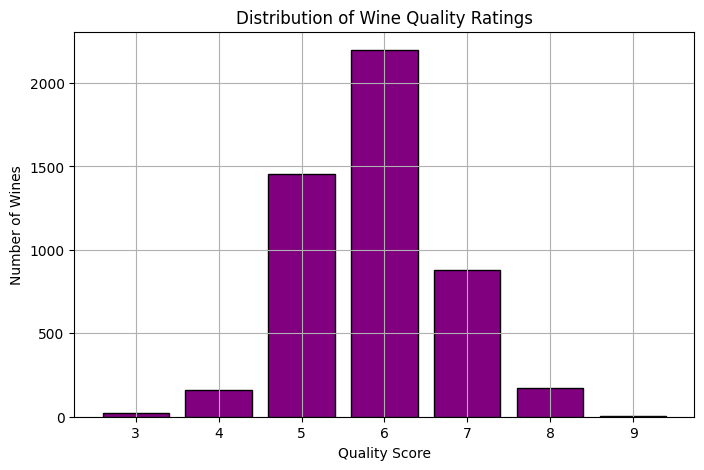

In [ ]:
#Wine quality scores
if "quality" in df.columns:
    print("Unique Quality Ratings and Their Counts:")
    print(df["quality"].value_counts().sort_index(), "\n")

    # Bar graph of wine quality distribution
    plt.figure(figsize=(8,5))
    plt.bar(df["quality"].value_counts().sort_index().index,
            df["quality"].value_counts().sort_index().values,
            color='purple', edgecolor='black')
    plt.title("Distribution of Wine Quality Ratings")
    plt.xlabel("Quality Score")
    plt.ylabel("Number of Wines")
    plt.grid(True)
    plt.show()

In [ ]:
#Outliers using IQR
numeric_cols = df.select_dtypes(include=np.number).columns
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

    print(f"{col}: {len(outliers)} outliers")

fixed acidity: 119 outliers
volatile acidity: 186 outliers
citric acid: 270 outliers
residual sugar: 7 outliers
chlorides: 208 outliers
free sulfur dioxide: 50 outliers
total sulfur dioxide: 19 outliers
density: 5 outliers
pH: 75 outliers
sulphates: 124 outliers
alcohol: 0 outliers
quality: 200 outliers


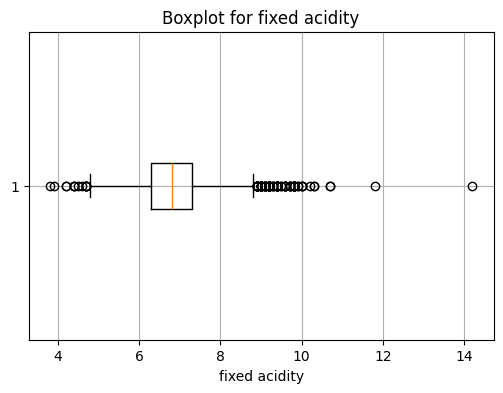

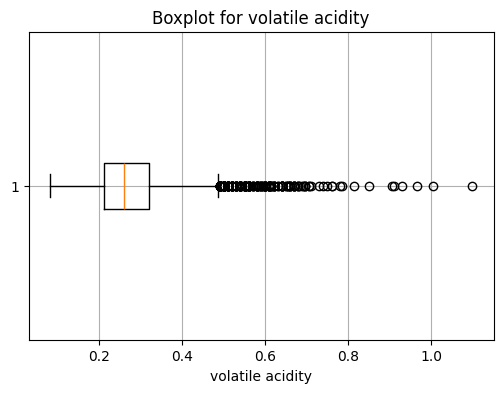

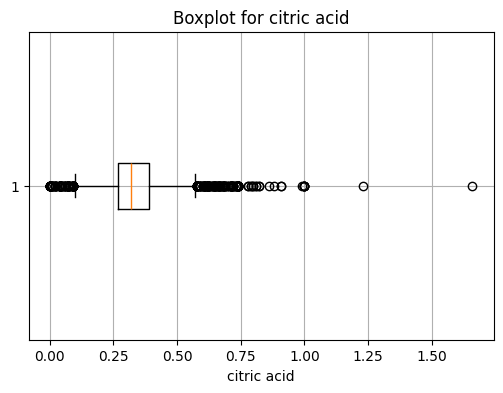

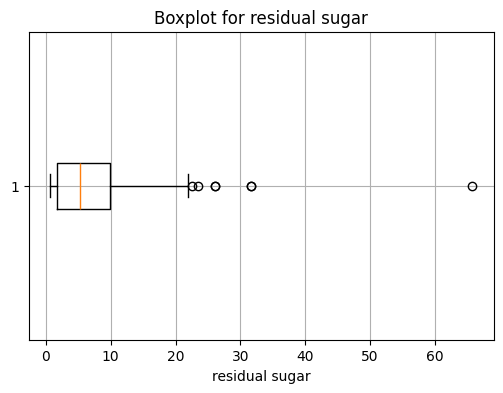

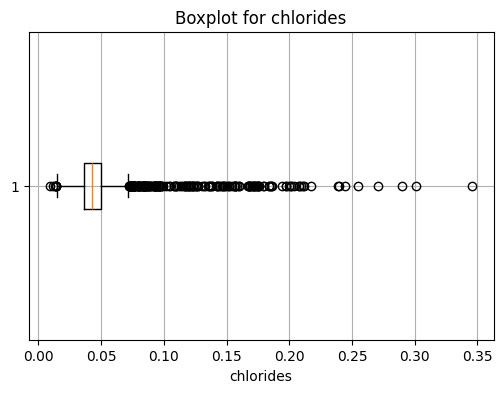

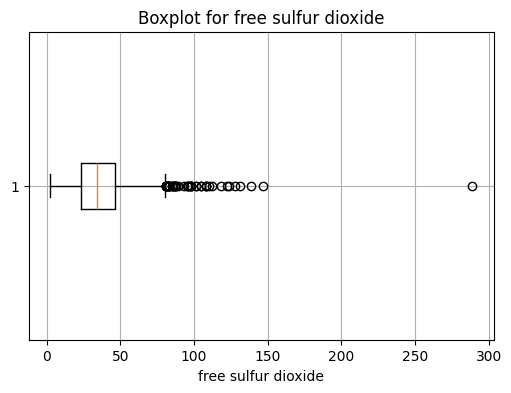

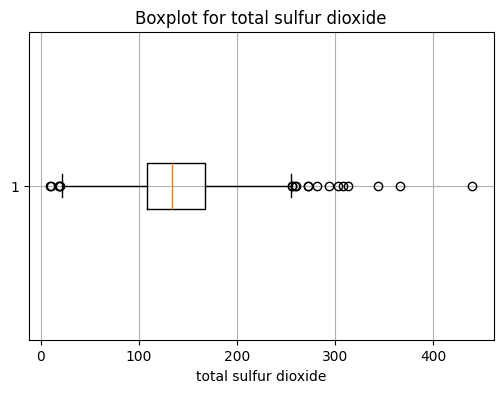

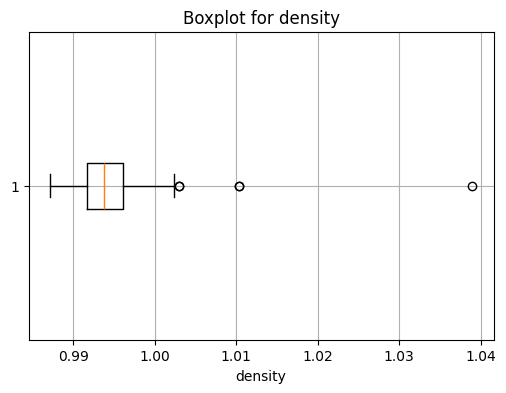

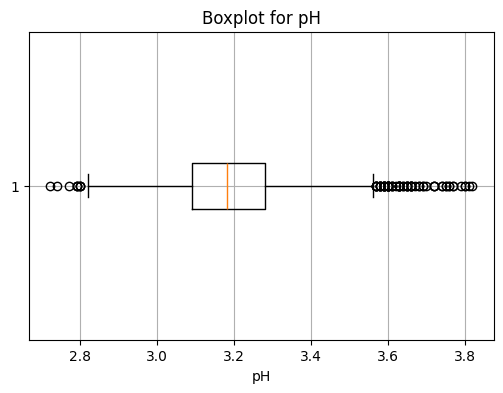

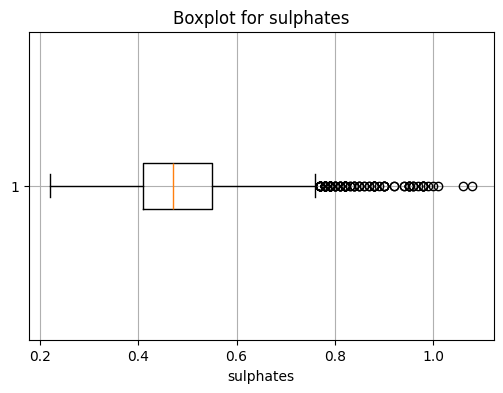

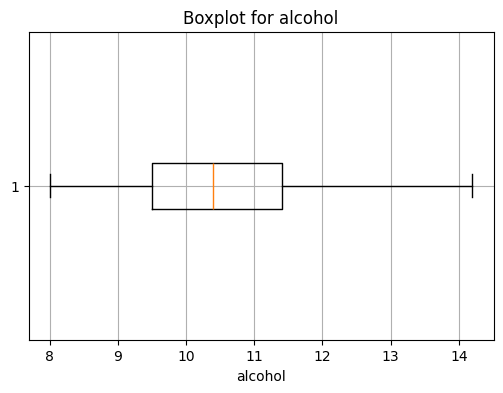

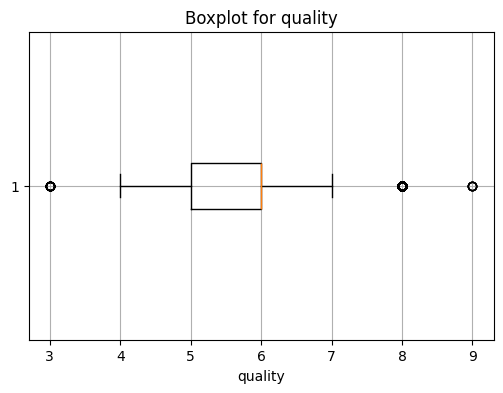

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()